NAME- TANU GOYAL

MNIST DATASET

In [1]:
#Connect to your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#checking the available files
%cd /gdrive/My\ Drive/digit-recognizer
!ls -ltr


/gdrive/My Drive/digit-recognizer
total 125132
-rw------- 1 root root 51118296 Mar 23  2023 test.csv
-rw------- 1 root root   240909 Mar 23  2023 sample_submission.csv
-rw------- 1 root root 76775041 Mar 23  2023 train.csv


#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Reading training and test data

In [ ]:

mnist_train = pd.read_csv("train.csv")
mnist_test  = pd.read_csv("test.csv")

NameError: ignored

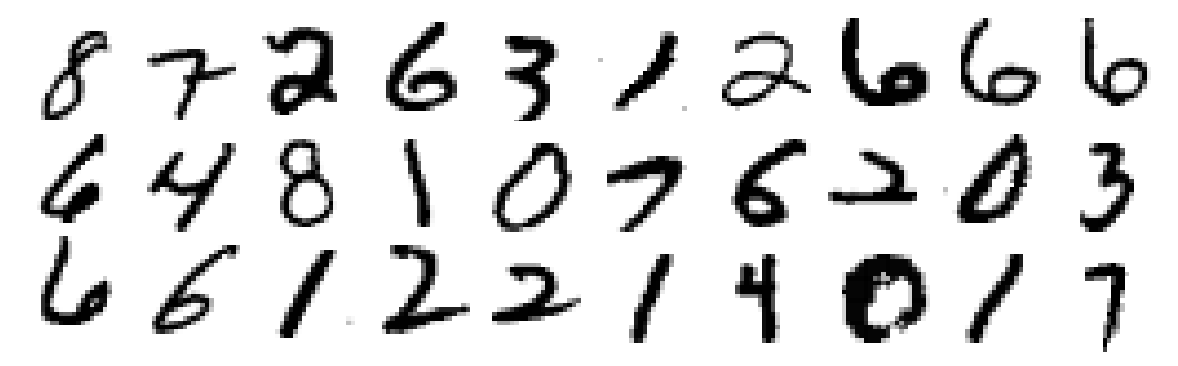

In [ ]:
# VISUALIZE DATA
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


### Check whether data is balanced or imbalanced

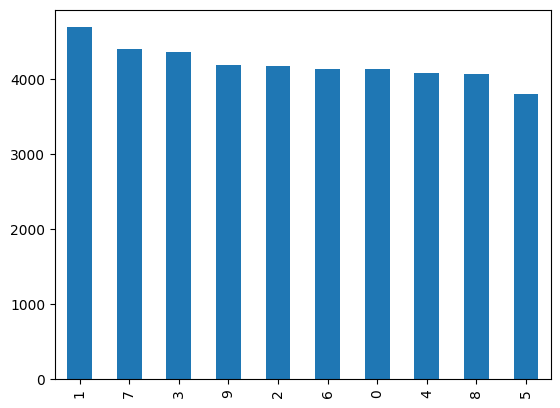

In [ ]:

_ = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

In [ ]:

X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [ ]:
#Data is being Scaled now to make it uniform
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [ ]:
X.max()

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    1.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

PCA FOR DATA VISULIZATION

In [ ]:

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


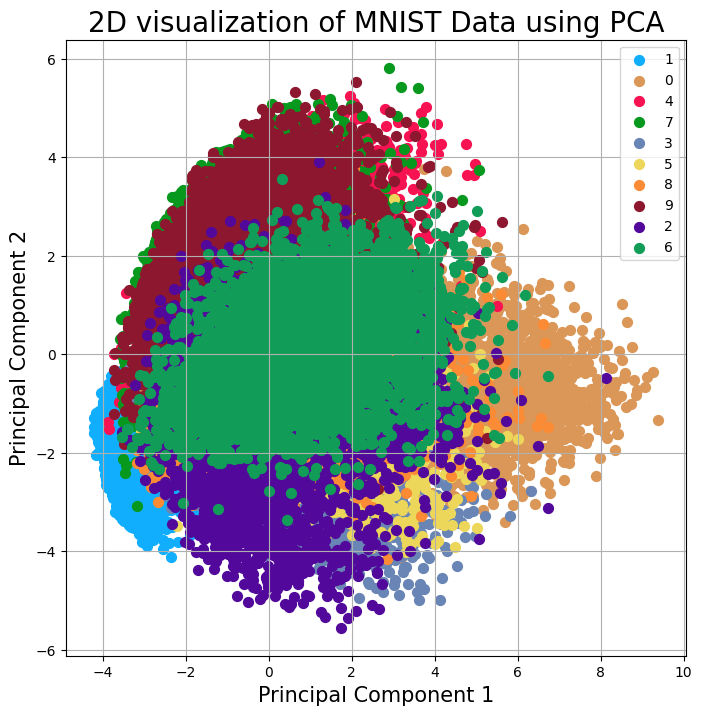

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


#Spliting the Data

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(25200, 784) (10500, 784) (6300, 784) (25200,) (10500,) (6300,)


#Logistic Regression

In [ ]:

logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=2,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START C=2.0826774385596982, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.920 total time= 2.7min
[CV 2/5; 1/8] START C=2.0826774385596982, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.919 total time= 2.5min
[CV 3/5; 1/8] START C=2.0826774385596982, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.911 total time= 2.5min
[CV 4/5; 1/8] START C=2.0826774385596982, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.912 total time= 2.5min
[CV 5/5; 1/8] START C=2.0826774385596982, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.914 total time= 2.5min
[CV 1/5; 2/8] START C=2.0826774385596982, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 2/8] END C=2.0826774385596982, penalty=l1;, score=0.920 total time= 6.6min
[CV 2/5; 2/8] START C=2.0826774385596982, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 2/8] END C=2.0826774385596982, penalty=l1;, score=0.920 total time= 6.7min
[CV 3/5; 2/8] START C=2.0826774385596982, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 2/8] END C=2.0826774385596982, penalty=l1;, score=0.914 total time= 6.7min
[CV 4/5; 2/8] START C=2.0826774385596982, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 2/8] END C=2.0826774385596982, penalty=l1;, score=0.914 total time= 6.7min
[CV 5/5; 2/8] START C=2.0826774385596982, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 2/8] END C=2.0826774385596982, penalty=l1;, score=0.914 total time= 6.6min
[CV 1/5; 3/8] START C=1.3110912464883726, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 3/8] END C=1.3110912464883726, penalty=l2;, score=0.921 total time= 2.5min
[CV 2/5; 3/8] START C=1.3110912464883726, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 3/8] END C=1.3110912464883726, penalty=l2;, score=0.920 total time= 2.5min
[CV 3/5; 3/8] START C=1.3110912464883726, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 3/8] END C=1.3110912464883726, penalty=l2;, score=0.913 total time= 2.5min
[CV 4/5; 3/8] START C=1.3110912464883726, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 3/8] END C=1.3110912464883726, penalty=l2;, score=0.912 total time= 2.5min
[CV 5/5; 3/8] START C=1.3110912464883726, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 3/8] END C=1.3110912464883726, penalty=l2;, score=0.914 total time= 2.5min
[CV 1/5; 4/8] START C=1.3110912464883726, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 4/8] END C=1.3110912464883726, penalty=l1;, score=0.921 total time= 6.3min
[CV 2/5; 4/8] START C=1.3110912464883726, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 4/8] END C=1.3110912464883726, penalty=l1;, score=0.922 total time= 6.3min
[CV 3/5; 4/8] START C=1.3110912464883726, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 4/8] END C=1.3110912464883726, penalty=l1;, score=0.915 total time= 6.3min
[CV 4/5; 4/8] START C=1.3110912464883726, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 4/8] END C=1.3110912464883726, penalty=l1;, score=0.915 total time= 6.2min
[CV 5/5; 4/8] START C=1.3110912464883726, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 4/8] END C=1.3110912464883726, penalty=l1;, score=0.916 total time= 6.2min
[CV 1/5; 5/8] START C=0.9999867067456014, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 5/8] END C=0.9999867067456014, penalty=l2;, score=0.921 total time= 2.5min
[CV 2/5; 5/8] START C=0.9999867067456014, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 5/8] END C=0.9999867067456014, penalty=l2;, score=0.920 total time= 2.5min
[CV 3/5; 5/8] START C=0.9999867067456014, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 5/8] END C=0.9999867067456014, penalty=l2;, score=0.914 total time= 2.5min
[CV 4/5; 5/8] START C=0.9999867067456014, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 5/8] END C=0.9999867067456014, penalty=l2;, score=0.913 total time= 2.5min
[CV 5/5; 5/8] START C=0.9999867067456014, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 5/8] END C=0.9999867067456014, penalty=l2;, score=0.915 total time= 2.5min
[CV 1/5; 6/8] START C=0.9999867067456014, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 6/8] END C=0.9999867067456014, penalty=l1;, score=0.921 total time= 6.0min
[CV 2/5; 6/8] START C=0.9999867067456014, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 6/8] END C=0.9999867067456014, penalty=l1;, score=0.922 total time= 5.9min
[CV 3/5; 6/8] START C=0.9999867067456014, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 6/8] END C=0.9999867067456014, penalty=l1;, score=0.917 total time= 5.9min
[CV 4/5; 6/8] START C=0.9999867067456014, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 6/8] END C=0.9999867067456014, penalty=l1;, score=0.917 total time= 5.9min
[CV 5/5; 6/8] START C=0.9999867067456014, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 6/8] END C=0.9999867067456014, penalty=l1;, score=0.916 total time= 5.8min
[CV 1/5; 7/8] START C=3.8112676365836466, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 7/8] END C=3.8112676365836466, penalty=l2;, score=0.919 total time= 2.5min
[CV 2/5; 7/8] START C=3.8112676365836466, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 7/8] END C=3.8112676365836466, penalty=l2;, score=0.919 total time= 2.5min
[CV 3/5; 7/8] START C=3.8112676365836466, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 7/8] END C=3.8112676365836466, penalty=l2;, score=0.912 total time= 2.4min
[CV 4/5; 7/8] START C=3.8112676365836466, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 7/8] END C=3.8112676365836466, penalty=l2;, score=0.911 total time= 2.4min
[CV 5/5; 7/8] START C=3.8112676365836466, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 7/8] END C=3.8112676365836466, penalty=l2;, score=0.913 total time= 2.4min
[CV 1/5; 8/8] START C=3.8112676365836466, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 8/8] END C=3.8112676365836466, penalty=l1;, score=0.919 total time= 6.6min
[CV 2/5; 8/8] START C=3.8112676365836466, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 8/8] END C=3.8112676365836466, penalty=l1;, score=0.919 total time= 6.7min
[CV 3/5; 8/8] START C=3.8112676365836466, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 8/8] END C=3.8112676365836466, penalty=l1;, score=0.912 total time= 6.6min
[CV 4/5; 8/8] START C=3.8112676365836466, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 8/8] END C=3.8112676365836466, penalty=l1;, score=0.913 total time= 6.6min
[CV 5/5; 8/8] START C=3.8112676365836466, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 8/8] END C=3.8112676365836466, penalty=l1;, score=0.914 total time= 6.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:

best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.9999867067456014, multi_class='multinomial', n_jobs=2,
                   penalty='l1', solver='saga', tol=0.001)

In [ ]:
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=0.9999867067456014, multi_class='multinomial', n_jobs=2,
                   penalty='l1', solver='saga', tol=0.001)
0.9182857142857144


In [ ]:

y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print("accuracy of logistic regression",acc)

accuracy of logistic regression 0.9177142857142857
